<h1>Machine Learning Project 4 - SVM </h1>
<p>Joshua John and Liora Wachsstock</p>

We generated points using the random.randint() python library, which has a random uniform discrete distribution. We assigned a positive value to the point if it was above the y = x line, and a negative value if it was below it. If the data was to be non-linearly separable, then around 10% of the time we switched the point's value.

Special things we did: we kept the best weights during the svm learning (similar to the pocket algorithm from the PLA). "Best weights" means the weights that are associated with least number of misclassified points.

We did not use the same data as the PLA Algorithm because we generate the data randomly each time. Therefore, we did not answer questions 8 and 9. 

<h2> Useful Functions

<h4>Generate Data</h4>

In [1]:
import random
import time

random.seed(time.time())

def generate_data(size, linearly_separable=True, min_dist_btwn_points=0):
    data = [[0 for x in range(2)] for y in range(size)] 

    num_pos, num_neg = 0, 0
    
    for i in range(size):

        # Create random data point
        data[i][0] = random.randint(1,100)
        data[i][1] = random.randint(1,100)
        
        # Create optional distance between classes
        while(abs(data[i][0] - data[i][1]) <= min_dist_btwn_points):
            data[i][0] = random.randint(1,100)
            data[i][1] = random.randint(1,100)
            
        # Make sure there are equal amounts in each class
        while(num_pos >= (size / 2) and data[i][0] < data[i][1]):
            data[i][0] = random.randint(1,100)
            data[i][1] = random.randint(1,100) 
        while(num_neg >= (size / 2) and data[i][0] >= data[i][1]):
            data[i][0] = random.randint(1,100)
            data[i][1] = random.randint(1,100)
            
        # Point's position relative to x = y line determines value        
        if (data[i][0] < data[i][1]):
            data[i].append(1)
            num_pos += 1
        else:
            data[i].append(-1)
            num_neg += 1

        # Create non-linearly separable data by switching up the value 10% of the time
        # as long as a class is not full
        if (not linearly_separable and random.randint(1,10) % 10 == 0 and num_pos < (size / 2) and num_neg < (size / 2)):
            data[i][2] *= -1
            num_pos = num_pos + (1 if data[i][2] == 1 else -1)
            num_neg = num_neg + (1 if data[i][2] == -1 else -1)
            
    return data

<h4>Get the number of misclassifed points</h4>

In [2]:
import numpy as np
def num_missclassified_points(w, x, y):
    missed_points = []
    signs = np.sign(np.dot(x,w)) 
    for i in range(len(x)):
        if signs[i] != y[i]:
            missed_points.append(i)
    return len(missed_points)

<h3>SVM algorithm </h3>

In [3]:
import numpy as np
# calculate the loss of the weights
def get_loss(W, x, y, C):
    return 1/2 * np.sum(W**2) + C * np.sum([np.max([0, 1 - y[i] * (np.dot(W,x[i]))]) for i in range(len(x))])

# calculate the gradient of the loss
def lossGradient(W, x, y, C):
    lossGrad = np.zeros_like(W)
    distance = np.max([0, 1 - y * (np.dot(W,x))])
    
    if distance == 0:
        lossGrad = W
    else:
        lossGrad = W - np.multiply(np.multiply(x,y), C)
    
    return lossGrad

# svm algorithm using stochastic gradient decent 
def svm_sgd(X, Y, W, N_steps, lr, C): 
    low_loss = -1
    loss_over_time = []
    best_W = W
    best_checkpoint = 0
    
    update_counter = 0;
    for step in range(N_steps):
        point = np.random.randint(len(X)) # get a random index from the input array
        W = W - (lr * lossGradient(W, X[point], Y[point], C)) # update the weights based off the gradient of that array
        loss = get_loss(W,X,Y,C)
        update_counter += 1
        
        loss_over_time.append(loss) #for plotting at the end
        if loss < low_loss or low_loss == -1:
            best_checkpoint = update_counter
            low_loss = loss
            best_W = w
            
    return [W, best_checkpoint, N_steps, loss_over_time]

<h4>Order Data Function</h4>

In [4]:
def order(data):
    ordered_data = []
    for i in range(len(data)):
        if data[i][2] > 0:
            ordered_data.append(data[i])
            
    for i in range(len(data)):
        if data[i][2] <= 0:
            ordered_data.append(data[i])
            
    return ordered_data

<h4>Separate Data</h4>

In [5]:
def sep_data(data):
    #separate the points from values
    values, points = [],[]
    for i in range(len(data)):
        values.append(data[i][2])
        points.append([1, data[i][0], data[i][1]])  #using a dummy variable 1 for x0 (ie use w*x_aug) instead of b + w*x
    
    return [points, values]

<h4>Plot and Print Data</h4>

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

def accuracy(weights, data):
    points, values = sep_data(data)
    return (float(num_missclassified_points(weights, points, values)) / len(data)) * 100

def line_string(weights):
    return 'y = ('+ str(-weights[0]) + ' + ' + str(-weights[1]) + 'x)/' + str(weights[2])

def print_stats(train_ls, test_ls, weights, lr, final_weights, C, total_updates, iterations, train_accuracy, test_accuracy):
    print('Note. We generated the points using the python library random.randint() for both x and y coordinates,')
    print('   which has a random uniform distribution. We then assigned a value based on the points position relative')
    print('   to the y = x line. For non-linearly separable data, we flipped the value 10% of the time.')
    print('    (https://docs.python.org/3/library/random.html)')
    print('1. Linearly separable training data :', train_ls)
    print('2. Linearly separable test data:', test_ls)
    print('3. Initial learning weights:', weights, ', learing rate:', lr, ', and C constant:', C)
    print('4.', line_string(final_weights))
    print('5. Total times the weights were updated:', total_updates)
    print('6. Final missclassification error on training data: ' + str(train_accuracy) + '%')
    print('   Final missclassification error on test data: '+ str(test_accuracy) + '%')
    print('7. the margin width is:', 2 / np.sqrt(sum(w**2)))
    

def print_conclusions(base_case, case_I, case_II, case_III):
    print("Base case used w = [0,0,0], step_size constant = 1, and points were kept in their random order.")
    print("The resulting line was", line_string(base_case))
    print('')
    print("I. w = [1,2,3], step_size = 1, and the points were kept in their random order:") 
    print("   Resulting line:", line_string(case_I))
    print("   Compared to base case result:", line_string(base_case))
    print('')
    print("II. w = [0,0,0], step_size = 2, and the points were kept in their random order:") 
    print("   Resulting line:", line_string(case_II))
    print("   Compared to base case result:", line_string(base_case))
    print('')
    print("III. w = [0,0,0], step_size = 1, and the points were grouped according to class (PLA dealt with one and then the other):") 
    print("   Resulting line:", line_string(case_III))
    print("   Compared to base case result:", line_string(base_case))
    

def plot_data(data, graph_title, weights=[], margins = False):
    df = pd.DataFrame(data, columns=("X", "Y", "value"))
    df.plot.scatter(x="X", y="Y", c="value", cmap='viridis', title=graph_title)

    x = np.array(range(100))
    
    #actual classifying line
    y = ((-weights[0]) - weights[1]*x) / weights[2]
    plt.plot(x, y)
    
    if (margins):
        #top margin line
        y1 = (((-weights[0]) - (weights[1]*x) + 1) / weights[2])
        plt.plot(x, y1)
    
        #bottom margin line
        y2 = (((-weights[0]) - (weights[1]*x) - 1) / weights[2])
        plt.plot(x, y2)

<h3><u> Generate Test Data:</u></h3>

In [7]:
test_data = generate_data(30, False, 10)
test_points, test_values = sep_data(test_data)

<h2><u>Linearly Separable Data Set</u></h2>

<h3>Generate Training Data:

In [8]:
tr_data_ls = generate_data(50, min_dist_btwn_points=20)

#serperate data
tr_points, tr_values = sep_data(tr_data_ls)

<h4>Base case (w = [0,0,0], step_size = 1, ordered = false):

Note. We generated the points using the python library random.randint() for both x and y coordinates,
   which has a random uniform distribution. We then assigned a value based on the points position relative
   to the y = x line. For non-linearly separable data, we flipped the value 10% of the time.
    (https://docs.python.org/3/library/random.html)
1. Linearly separable training data : True
2. Linearly separable test data: False
3. Initial learning weights: [0, 0, 0] , learing rate: 0.0005 , and C constant: 1
4. y = (0.000821775238083945 + 0.07335171231302275x)/0.07614828060597537
5. Total times the weights were updated: 400
6. Final missclassification error on training data: 0.0%
   Final missclassification error on test data: 13.333333333333334%
7. the margin width is: 18.9153653160475


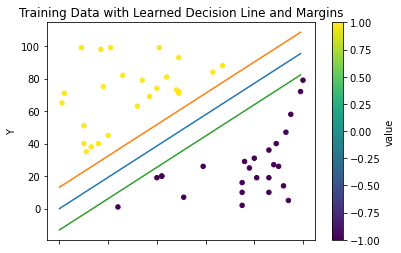

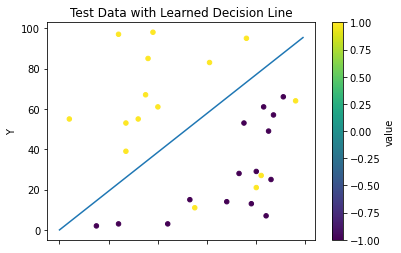

In [9]:
#Variables
steps = 400
learning_rate = 0.0005
C = 1;
w = np.array([0,0,0])

#Run SVM Algorithm on training Data
w, updates, iterations, loss_array = svm_sgd(tr_points, tr_values, w, steps, learning_rate, C)

plot_data(tr_data_ls, 'Training Data with Learned Decision Line and Margins', w, margins = True)
plot_data(test_data, 'Test Data with Learned Decision Line', w)
print_stats(True, False, [0,0,0], learning_rate, w, C, updates, iterations, accuracy(w, tr_data_ls), accuracy(w, test_data))

These variables in the training data gave the largest margins for the training data, and gernated a reasonable line for classifying the test data. 

<h4>Case I. where w = [1,1,1] step_size = 0.0001, ordered = false, C = 1

Note. We generated the points using the python library random.randint() for both x and y coordinates,
   which has a random uniform distribution. We then assigned a value based on the points position relative
   to the y = x line. For non-linearly separable data, we flipped the value 10% of the time.
    (https://docs.python.org/3/library/random.html)
1. Linearly separable training data : True
2. Linearly separable test data: False
3. Initial learning weights: [0, 0, 0] , learing rate: 0.0001 , and C constant: 1
4. y = (-0.9409883124298969 + -1.406471852229905x)/3.331604818202064
5. Total times the weights were updated: 400
6. Final missclassification error on training data: 50.0%
   Final missclassification error on test data: 50.0%
7. the margin width is: 0.5352261429207134


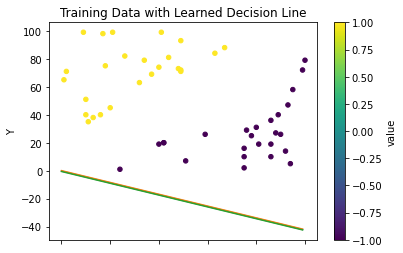

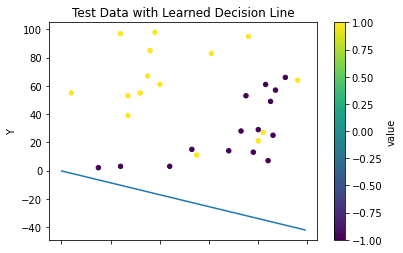

In [10]:
#Variables
steps = 400
learning_rate = 0.0001
C = 1;
w = np.array([1,3,4])

#Run SVM Algorithm on training Data
w, updates, iterations, loss_array = svm_sgd(tr_points, tr_values, w, steps, learning_rate, C)

plot_data(tr_data_ls, 'Training Data with Learned Decision Line', w, margins = True)
plot_data(test_data, 'Test Data with Learned Decision Line', w)
print_stats(True, False, [0,0,0], learning_rate, w, C, updates, iterations, accuracy(w, tr_data_ls), accuracy(w, test_data))

Changing the initial weights tends to changes the orientation of the line generated as well as the margin size. This  likely happens because the learning model here would need adjustments in more steps and constants.

<h4>Case II. where w = [0,0,0] step_size = 0.1, ordered = false, C = 1

Note. We generated the points using the python library random.randint() for both x and y coordinates,
   which has a random uniform distribution. We then assigned a value based on the points position relative
   to the y = x line. For non-linearly separable data, we flipped the value 10% of the time.
    (https://docs.python.org/3/library/random.html)
1. Linearly separable training data : True
2. Linearly separable test data: False
3. Initial learning weights: [0, 0, 0] , learing rate: 0.1 , and C constant: 1
4. y = (-0.06057599116563188 + 5.973902184853974x)/3.5670669599770553
5. Total times the weights were updated: 113
6. Final missclassification error on training data: 10.0%
   Final missclassification error on test data: 26.666666666666668%
7. the margin width is: 0.28743482429340267


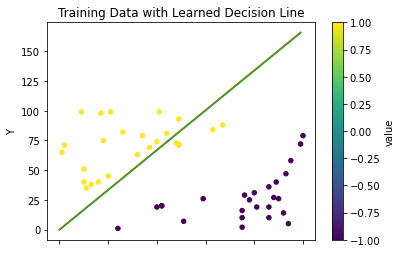

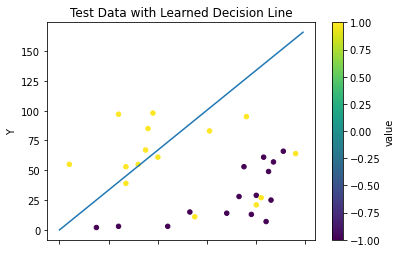

In [11]:
#Variables
steps = 400
learning_rate = 0.1
C = 1;
w = np.array([0,0,0])

#Run SVM Algorithm on training Data
w, updates, iterations, loss_array = svm_sgd(tr_points, tr_values, w, steps, learning_rate, C)

plot_data(tr_data_ls, 'Training Data with Learned Decision Line', w, margins = True)
plot_data(test_data, 'Test Data with Learned Decision Line', w)
print_stats(True, False, [0,0,0], learning_rate, w, C, updates, iterations, accuracy(w, tr_data_ls), accuracy(w, test_data))

Increasing the learning rate creates an uncentered line and very small margins.This is likely due to too big of adjustments to the weights.

<h4>Case III. where w = [0,0,0] step_size = 0.0001, ordered = True, C = 1

Note. We generated the points using the python library random.randint() for both x and y coordinates,
   which has a random uniform distribution. We then assigned a value based on the points position relative
   to the y = x line. For non-linearly separable data, we flipped the value 10% of the time.
    (https://docs.python.org/3/library/random.html)
1. Linearly separable training data : True
2. Linearly separable test data: False
3. Initial learning weights: [0, 0, 0] , learing rate: 0.0001 , and C constant: 1
4. y = (0.00028927271101387465 + 0.06061299556303216x)/0.05929652097642844
5. Total times the weights were updated: 400
6. Final missclassification error on training data: 0.0%
   Final missclassification error on test data: 13.333333333333334%
7. the margin width is: 23.586453352835274


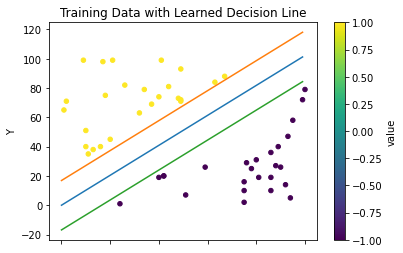

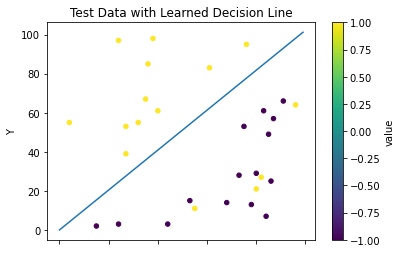

In [12]:
#Variables
steps = 400
learning_rate = 0.0001
C = 1;
w = np.array([0,0,0])

ordered_points, ordered_values = sep_data(order(tr_data_ls))

#Run SVM Algorithm on training Data
w, updates, iterations, loss_array = svm_sgd(ordered_points, ordered_values, w, steps, learning_rate, C)

plot_data(tr_data_ls, 'Training Data with Learned Decision Line', w, margins = True)
plot_data(test_data, 'Test Data with Learned Decision Line', w)
print_stats(True, False, [0,0,0], learning_rate, w, C, updates, iterations, accuracy(w, tr_data_ls), accuracy(w, test_data))

Ordering the data does not seem to change the outcome from the base case. As in the base case, the training data has large margins, and results in a low-error classifying line. 

<h4>Case IV. where w = [0,0,0] step_size = 0.0001, ordered = false, C = 0.1

Note. We generated the points using the python library random.randint() for both x and y coordinates,
   which has a random uniform distribution. We then assigned a value based on the points position relative
   to the y = x line. For non-linearly separable data, we flipped the value 10% of the time.
    (https://docs.python.org/3/library/random.html)
1. Linearly separable training data : True
2. Linearly separable test data: False
3. Initial learning weights: [0, 0, 0] , learing rate: 0.0001 , and C constant: 0.1
4. y = (-0.00017569411105590335 + 0.03251295914922808x)/0.03608508840072018
5. Total times the weights were updated: 393
6. Final missclassification error on training data: 0.0%
   Final missclassification error on test data: 13.333333333333334%
7. the margin width is: 41.175830816353326


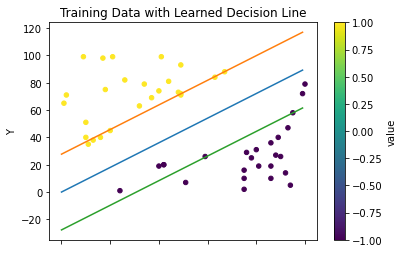

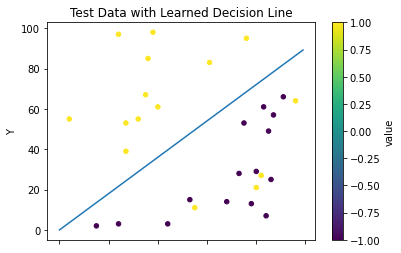

In [13]:
#Variables
steps = 400
learning_rate = 0.0001
C = 0.1;
w = np.array([0,0,0])

#Run SVM Algorithm on training Data
w, updates, iterations, loss_array = svm_sgd(tr_points, tr_values, w, steps, learning_rate, C)

plot_data(tr_data_ls, 'Training Data with Learned Decision Line', w, margins = True)
plot_data(test_data, 'Test Data with Learned Decision Line', w)
print_stats(True, False, [0,0,0], learning_rate, w, C, updates, iterations, accuracy(w, tr_data_ls), accuracy(w, test_data))

Decreasing C too much can cause the margins to get to big, but does not affect the quality (number of points missclassified) of the classifying line. 

<h2><u>NON-Linearly Separable Data Set</u></h2>

In [14]:
tr_data_ls1 = generate_data(50, linearly_separable=False, min_dist_btwn_points = 10)

#seperate data
tr_points1, tr_values1 = sep_data(tr_data_ls1)

<h4>Base case (w = [0,0,0], learning_rate = 1, ordered = false, , C = 0.5

Note. We generated the points using the python library random.randint() for both x and y coordinates,
   which has a random uniform distribution. We then assigned a value based on the points position relative
   to the y = x line. For non-linearly separable data, we flipped the value 10% of the time.
    (https://docs.python.org/3/library/random.html)
1. Linearly separable training data : True
2. Linearly separable test data: False
3. Initial learning weights: [0, 0, 0] , learing rate: 0.0001 , and C constant: 0.5
4. y = (0.0002413968255794449 + 0.04055292858435171x)/0.04937841808894772
5. Total times the weights were updated: 259
6. Final missclassification error on training data: 6.0%
   Final missclassification error on test data: 13.333333333333334%
7. the margin width is: 31.30037460232605


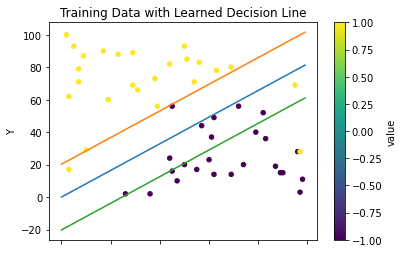

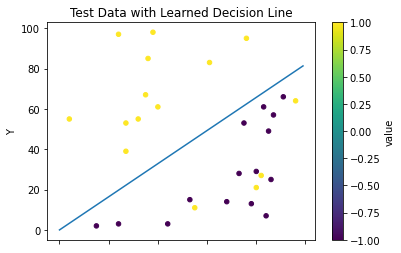

In [15]:
#Variables
steps = 400
learning_rate = 0.0001
C = 0.5;
w = np.array([0,0,0])

#Run SVM Algorithm on training Data
w, updates, iterations, loss_array = svm_sgd(tr_points1, tr_values1, w, steps, learning_rate, C)

plot_data(tr_data_ls1, 'Training Data with Learned Decision Line', w, margins = True)
plot_data(test_data, 'Test Data with Learned Decision Line', w)
print_stats(True, False, [0,0,0], learning_rate, w, C, updates, iterations, accuracy(w, tr_data_ls1), accuracy(w, test_data))


When the training data is not linearly seperable the lines can change and not fit quite as well but the lines still try to aim for the center of the points much more than a PLA line would.

<h4>Case I. where w = [1,1,1] learning_rate = 0.0001, ordered = false, C = 0.5

Note. We generated the points using the python library random.randint() for both x and y coordinates,
   which has a random uniform distribution. We then assigned a value based on the points position relative
   to the y = x line. For non-linearly separable data, we flipped the value 10% of the time.
    (https://docs.python.org/3/library/random.html)
1. Linearly separable training data : True
2. Linearly separable test data: False
3. Initial learning weights: [0, 0, 0] , learing rate: 0.0001 , and C constant: 0.5
4. y = (-0.9508357357255636 + -0.27663186944375273x)/0.7193175349842839
5. Total times the weights were updated: 400
6. Final missclassification error on training data: 50.0%
   Final missclassification error on test data: 50.0%
7. the margin width is: 1.634065731332656


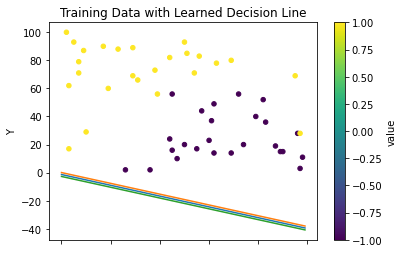

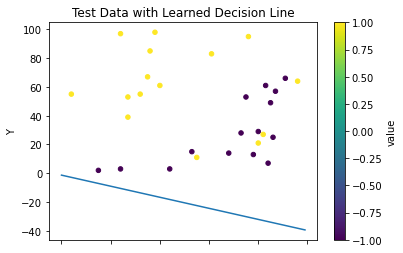

In [16]:
#Variables
steps = 400
learning_rate = 0.0001
C = 0.5;
w = np.array([1,1,1])

#Run SVM Algorithm on training Data
w, updates, iterations, loss_array = svm_sgd(tr_points1, tr_values1, w, steps, learning_rate, C)

plot_data(tr_data_ls1, 'Training Data with Learned Decision Line', w, margins = True)
plot_data(test_data, 'Test Data with Learned Decision Line', w)
print_stats(True, False, [0,0,0], learning_rate, w, C, updates, iterations, accuracy(w, tr_data_ls1), accuracy(w, test_data))

Using different weights has a large impact on the quality of the classifying line, similar to the effect it had on producing a line from the linearly seprable training data. 

<h4>Case II. where w = [0,0,0] learning_rate = 0.1, ordered = false, C = 0.5

Note. We generated the points using the python library random.randint() for both x and y coordinates,
   which has a random uniform distribution. We then assigned a value based on the points position relative
   to the y = x line. For non-linearly separable data, we flipped the value 10% of the time.
    (https://docs.python.org/3/library/random.html)
1. Linearly separable training data : True
2. Linearly separable test data: False
3. Initial learning weights: [0, 0, 0] , learing rate: 0.1 , and C constant: 0.5
4. y = (0.009140340862653666 + 0.9316249364064375x)/0.9219442533520984
5. Total times the weights were updated: 201
6. Final missclassification error on training data: 6.0%
   Final missclassification error on test data: 13.333333333333334%
7. the margin width is: 1.5258776379974828


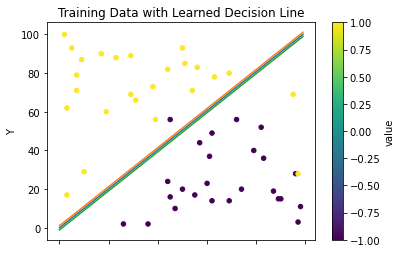

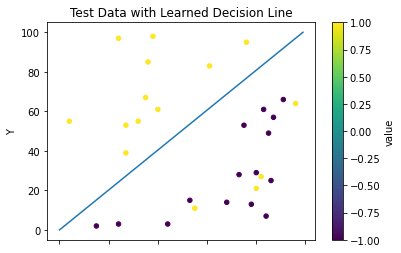

In [17]:
#Variables
steps = 400
learning_rate = 0.1
C = 0.5;
w = np.array([0,0,0])

#Run SVM Algorithm on training Data
w, updates, iterations, loss_array = svm_sgd(tr_points1, tr_values1, w, steps, learning_rate, C)

plot_data(tr_data_ls1, 'Training Data with Learned Decision Line', w, margins = True)
plot_data(test_data, 'Test Data with Learned Decision Line', w)
print_stats(True, False, [0,0,0], learning_rate, w, C, updates, iterations, accuracy(w, tr_data_ls1), accuracy(w, test_data))

Here we can see that the margins become very small and the generated line is very off.

<h4>Case III. where w = [0,0,0] learning_rate = 0.0001, ordered = true, C = 0.5

Note. We generated the points using the python library random.randint() for both x and y coordinates,
   which has a random uniform distribution. We then assigned a value based on the points position relative
   to the y = x line. For non-linearly separable data, we flipped the value 10% of the time.
    (https://docs.python.org/3/library/random.html)
1. Linearly separable training data : True
2. Linearly separable test data: False
3. Initial learning weights: [0, 0, 0] , learing rate: 0.0001 , and C constant: 0.5
4. y = (0.0005373426245352838 + 0.03853440355889592x)/0.04811080994768449
5. Total times the weights were updated: 378
6. Final missclassification error on training data: 6.0%
   Final missclassification error on test data: 13.333333333333334%
7. the margin width is: 32.44497143261846


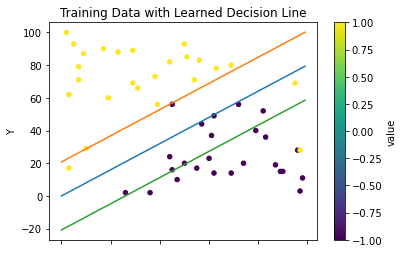

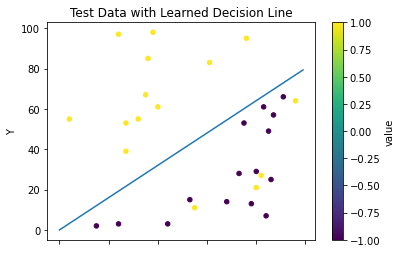

In [18]:
#Variables
steps = 400
learning_rate = 0.0001
C = 0.5;
w = np.array([0,0,0])

ordered_points1, ordered_values1 = sep_data(order(tr_data_ls1))

#Run SVM Algorithm on training Data
w, updates, iterations, loss_array = svm_sgd(ordered_points1, ordered_values1, w, steps, learning_rate, C)

plot_data(tr_data_ls1, 'Training Data with Learned Decision Line', w, margins = True)
plot_data(test_data, 'Test Data with Learned Decision Line', w)
print_stats(True, False, [0,0,0], learning_rate, w, C, updates, iterations, accuracy(w, tr_data_ls1), accuracy(w, test_data))

In this case, ordered points seem to be less accurate and generate big margins.

<h4>Case IV. where w = [0,0,0] learning_rate = 0.0001, ordered = false, C = 0.05

Note. We generated the points using the python library random.randint() for both x and y coordinates,
   which has a random uniform distribution. We then assigned a value based on the points position relative
   to the y = x line. For non-linearly separable data, we flipped the value 10% of the time.
    (https://docs.python.org/3/library/random.html)
1. Linearly separable training data : True
2. Linearly separable test data: False
3. Initial learning weights: [0, 0, 0] , learing rate: 0.0001 , and C constant: 0.05
4. y = (0.00015305739327262525 + 0.021995561441170163x)/0.02438591275519937
5. Total times the weights were updated: 399
6. Final missclassification error on training data: 6.0%
   Final missclassification error on test data: 13.333333333333334%
7. the margin width is: 60.90034341800571


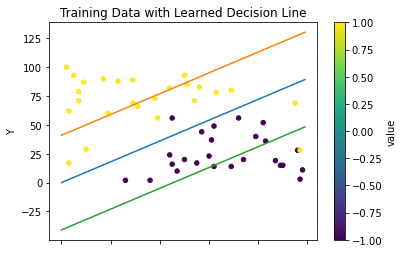

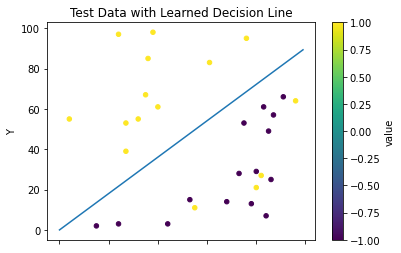

In [19]:
#Variables
steps = 400
learning_rate = 0.0001
C = 0.05;
w = np.array([0,0,0])

#Run SVM Algorithm on training Data
w, updates, iterations, loss_array = svm_sgd(tr_points1, tr_values1, w, steps, learning_rate, C)

plot_data(tr_data_ls1, 'Training Data with Learned Decision Line', w, margins = True)
plot_data(test_data, 'Test Data with Learned Decision Line', w)
print_stats(True, False, [0,0,0], learning_rate, w, C, updates, iterations, accuracy(w, tr_data_ls1), accuracy(w, test_data))

Again, we see that making C very small created very large margins, though the classifying line the algorithm produces is not that bad. 